In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
# Load cleaned data
bnd = pd.read_csv("../data/BND_cleaned.csv", parse_dates=["Date"], index_col="Date")
spy = pd.read_csv("../data/SPY_cleaned.csv", parse_dates=["Date"], index_col="Date")
tsla = pd.read_csv("../data/TSLA_cleaned.csv", parse_dates=["Date"], index_col="Date")

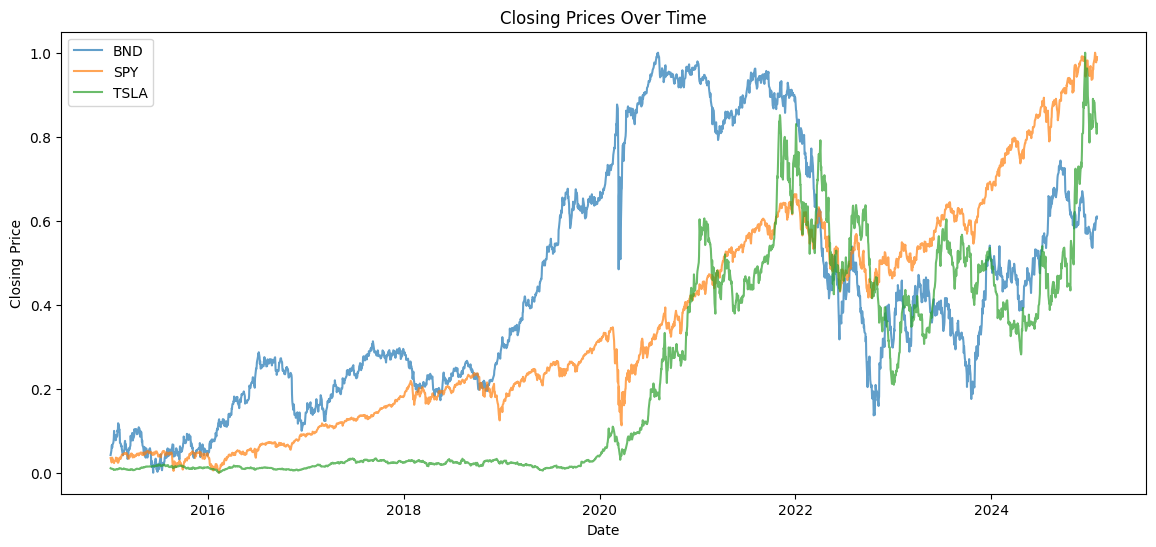

In [5]:
# Plot closing prices
plt.figure(figsize=(14, 6))
plt.plot(bnd.index, bnd['Close'], label='BND', alpha=0.7)
plt.plot(spy.index, spy['Close'], label='SPY', alpha=0.7)
plt.plot(tsla.index, tsla['Close'], label='TSLA', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing Prices Over Time")
plt.legend()
plt.show()

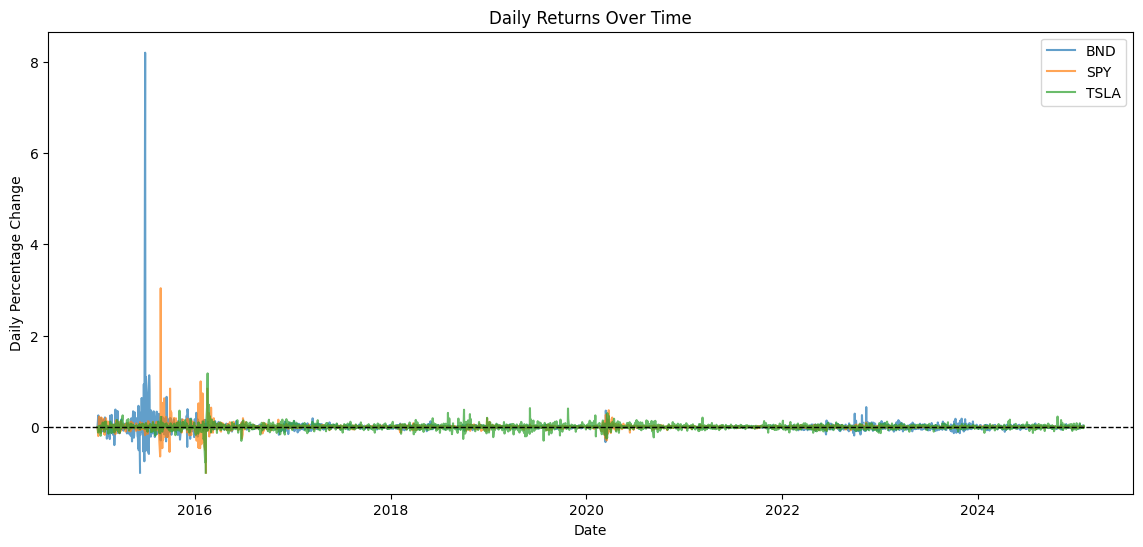

In [11]:
# Calculate and plot daily percentage change
bnd['Daily Return'] = bnd['Close'].pct_change().fillna(0)
spy['Daily Return'] = spy['Close'].pct_change().fillna(0)
tsla['Daily Return'] = tsla['Close'].pct_change().fillna(0)

plt.figure(figsize=(14, 6))
plt.plot(bnd.index, bnd['Daily Return'], label='BND', alpha=0.7)
plt.plot(spy.index, spy['Daily Return'], label='SPY', alpha=0.7)
plt.plot(tsla.index, tsla['Daily Return'], label='TSLA', alpha=0.7)
plt.axhline(0, color='black', linestyle='--', lw=1)
plt.xlabel("Date")
plt.ylabel("Daily Percentage Change")
plt.title("Daily Returns Over Time")
plt.legend()
plt.show()

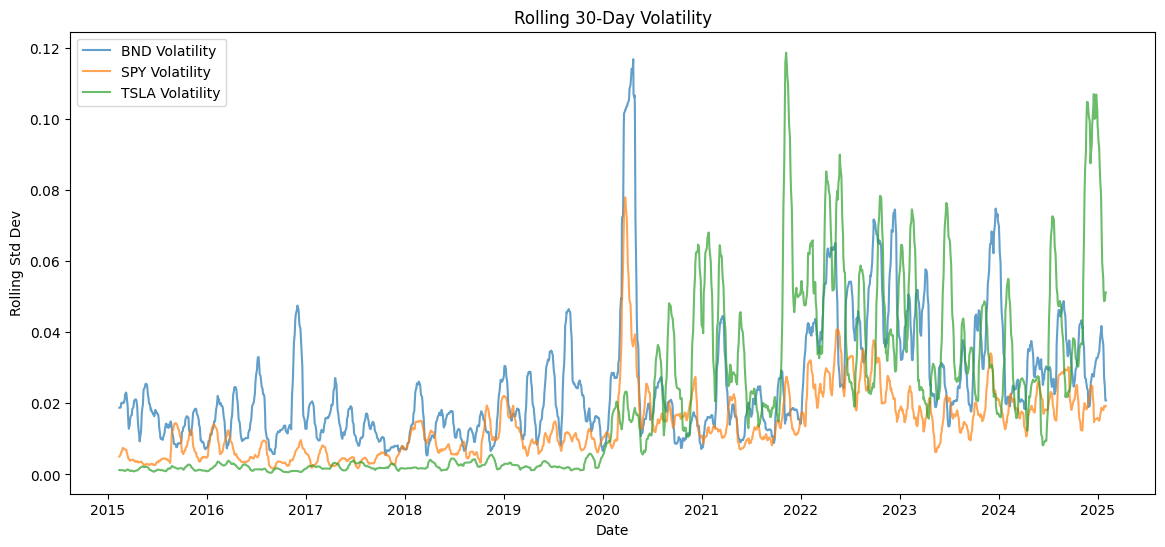

In [12]:
# Analyze volatility (rolling mean & std)
plt.figure(figsize=(14, 6))
plt.plot(bnd.index, bnd['Close'].rolling(30).std(), label='BND Volatility', alpha=0.7)
plt.plot(spy.index, spy['Close'].rolling(30).std(), label='SPY Volatility', alpha=0.7)
plt.plot(tsla.index, tsla['Close'].rolling(30).std(), label='TSLA Volatility', alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Rolling Std Dev")
plt.title(f"Rolling 30-Day Volatility")
plt.legend()
plt.show()

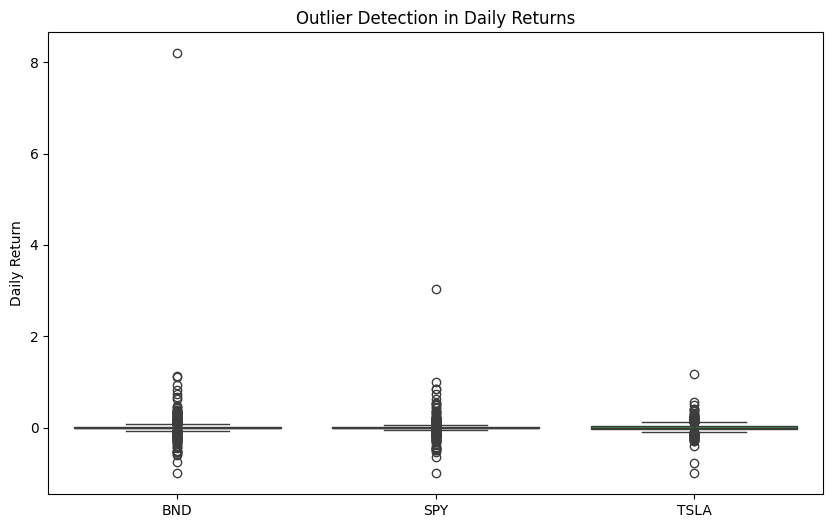

Outlier Count:
BND     0
SPY     0
TSLA    0
dtype: int64


/home/user/Time-Series-Forecasting-for-Portfolio-Management-Optimization/.env/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [13]:
# Detect outliers in daily returns
data = pd.DataFrame({
    'BND': bnd['Daily Return'],
    'SPY': spy['Daily Return'],
    'TSLA': tsla['Daily Return']
})
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title("Outlier Detection in Daily Returns")
plt.ylabel("Daily Return")
plt.show()

# Z-score analysis for outliers
z_scores = (data - data.mean()) / data.std()
outliers = (z_scores.abs() > 3).sum()
print("Outlier Count:")
print(outliers)

In [17]:
# Define function to extract numerical insights
def extract_numerical_insights(data, name):
    insights = {}
    df = data.copy()

    # Closing price trends
    insights['Max_Close'] = df['Close'].max()
    insights['Min_Close'] = df['Close'].min()
    insights['Avg_Close'] = df['Close'].mean()
    
    # Volatility (daily percentage change)
    df['Daily_Change'] = df['Close'].pct_change()
    insights['Max_Daily_Change'] = df['Daily_Change'].max()
    insights['Min_Daily_Change'] = df['Daily_Change'].min()
    insights['Avg_Daily_Change'] = df['Daily_Change'].mean()
    
    # Rolling statistics (30-day rolling window)
    df['Rolling_Mean'] = df['Close'].rolling(window=30).mean()
    df['Rolling_Std'] = df['Close'].rolling(window=30).std()
    insights['Avg_Rolling_Mean'] = df['Rolling_Mean'].mean()
    insights['Avg_Rolling_Std'] = df['Rolling_Std'].mean()
    
    # Outlier detection (based on 3 standard deviations)
    mean_change = insights['Avg_Daily_Change']
    std_change = df['Daily_Change'].std()
    outliers = df[(df['Daily_Change'] > mean_change + 3 * std_change) | 
                  (df['Daily_Change'] < mean_change - 3 * std_change)]
    
    insights['Num_Outliers'] = len(outliers)
    insights['Max_Outlier_Change'] = outliers['Daily_Change'].max() if not outliers.empty else np.nan
    insights['Min_Outlier_Change'] = outliers['Daily_Change'].min() if not outliers.empty else np.nan
    
    return pd.DataFrame(insights, index=[name])

# Apply function to each dataset
bnd_insights = extract_numerical_insights(bnd, "BND")
spy_insights = extract_numerical_insights(spy, "SPY")
tsla_insights = extract_numerical_insights(tsla, "TSLA")

# Combine results
numerical_summary = pd.concat([bnd_insights, spy_insights, tsla_insights])

# Display numerical insights
print(numerical_summary)

      Max_Close  Min_Close  Avg_Close  Max_Daily_Change  Min_Daily_Change  \
BND         1.0        0.0   0.437945               inf              -1.0   
SPY         1.0        0.0   0.351621               inf              -1.0   
TSLA        1.0        0.0   0.230224               inf              -1.0   

      Avg_Daily_Change  Avg_Rolling_Mean  Avg_Rolling_Std  Num_Outliers  \
BND                inf          0.439211         0.024816             0   
SPY                inf          0.349896         0.013713             0   
TSLA               inf          0.227927         0.020628             0   

      Max_Outlier_Change  Min_Outlier_Change  
BND                  NaN                 NaN  
SPY                  NaN                 NaN  
TSLA                 NaN                 NaN  


/home/user/Time-Series-Forecasting-for-Portfolio-Management-Optimization/.env/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/user/Time-Series-Forecasting-for-Portfolio-Management-Optimization/.env/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/user/Time-Series-Forecasting-for-Portfolio-Management-Optimization/.env/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
